In [ ]:
!pip install scipy==1.1.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from keras.datasets import mnist
from keras import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import glob
from skimage import io
import os
import scipy.misc
from scipy import *
from keras import regularizers
from cv2 import *
import scipy.misc
import imageio
from skimage.io import imread
from skimage.transform import resize as imresize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datasets_path = '/content/drive/MyDrive/python' 

def load_images(path,n=0):
    X = []
    Y=[]
    i=-1
    
    for back in os.listdir(path):
        back_path = os.path.join(path,back)
        for language in os.listdir(back_path):
            alphabet_path = os.path.join(back_path,language)
            for letter in os.listdir(alphabet_path):
                category_images = []
                i=i+1
                letter_path = os.path.join(alphabet_path,letter)

                for filename in os.listdir(letter_path):
                    image_path = os.path.join(letter_path,filename)
                    image = imread(image_path)
                    image = imresize(image,(28,28))
                    image = image/255
                    image = 1-image
                    Y.append(i)
                    X.append(image)
    return X,Y

print("training set")
x_train,y_train = load_images(datasets_path)


X = np.array(x_train)
y = np.array(y_train)
#print(y)
print(y.shape)
print(X.shape)

training set


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)
plt.imshow(X_train[4],cmap = 'gray')

['malignant' 'benign']
2


In [ ]:
data.data.shape

(569, 30)

In [ ]:
x = data.data.astype(np.float32)
y= data.target

In [ ]:
y.shape

(569,)

In [ ]:
x.shape

(569, 30)

In [ ]:
classVals, classCnts = np.unique(y, return_counts=True)
classVals_train, classCnts_train = np.unique(y_train, return_counts=True)
classVals_val, classCnts_val = np.unique(y_val, return_counts=True)

In [ ]:
for oneClass, oneCnt in zip(classVals, classCnts):
  print(f"{oneClass}: {oneCnt}")

0: 212
1: 357


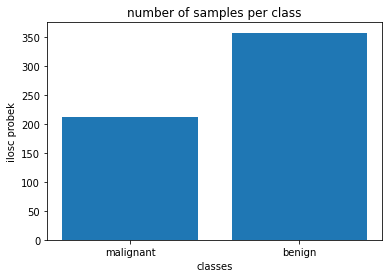

In [ ]:
fig = plt.Figure(figsize=(15,15))
plt.bar(data.target_names, classCnts)
plt.xlabel("classes")
plt.ylabel("ilosc probek")
plt.title("number of samples per class")
plt.show()

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
dfX = pd.DataFrame(
    data=x,
    columns = data.feature_names
)
dfX.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.399994,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.379999,17.330000,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.080002,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990000,23.410000,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.029999,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570000,25.530001,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.230000,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910000,26.500000,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.440002,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540001,16.670000,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x = MinMaxScaler().fit_transform(x)

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state = 13
)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1])))
model.add(
    layers.Dense(
        units = 32,
        activation = "relu",
        use_bias = True

      )
    )
model.add(
    layers.Dropout(0.3)
)
model.add(
    layers.Dense(
        units = 16,
        activation = "relu",
        use_bias = True

      )
    )

model.add(
    layers.Dropout(0.3)
)
model.add(
    layers.Dense(
        units = 1,
        activation = "sigmoid",
        use_bias = True

      )
  )

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                992       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = losses.BinaryCrossentropy()

In [ ]:
opt = optimizers.Adam(
    learning_rate = 0.01,
    
)

In [ ]:
model.compile(
    optimizer = opt,
    loss = loss,
    metrics = ['accuracy']
)

In [ ]:
resutls = model.fit(
    x=X_train,
    y= y_train,
    batch_size = 50,
    epochs = 1000,
    verbose = 0,
    validation_data = (x_val, y_val)
)

In [ ]:
resutls.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

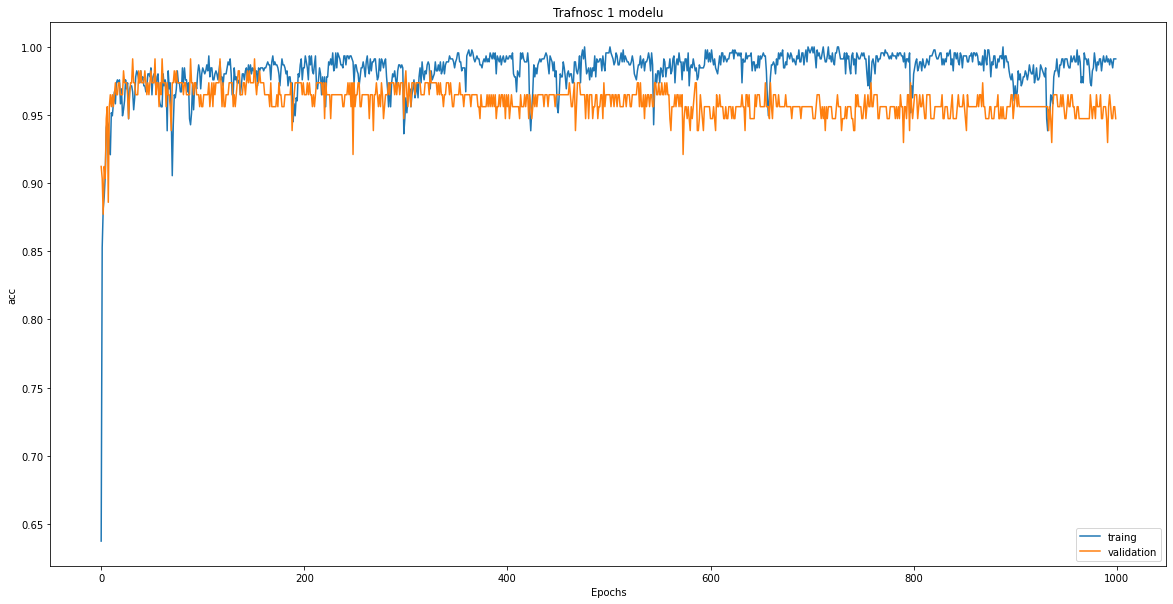

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(resutls.history["accuracy"])
plt.plot(resutls.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.title("Trafnosc 1 modelu")
plt.legend(["traing", "validation"])
plt.show()

In [ ]:
resutls.history["val_accuracy"][-1]

0.9473684430122375

In [ ]:
resutls.history["accuracy"][-1]

0.9912087917327881

In [ ]:
model2 = tf.keras.Sequential()
model2.add(layers.InputLayer(input_shape=(X_train.shape[1])))
model2.add(
    layers.Dense(
        units = 1,
        activation = "relu",
        use_bias = True

      )
)
model2.add(
    layers.Dense(
        units = 1,
        activation = "sigmoid",
        use_bias = True

      )
  )

In [ ]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1)                 31        
                                                                 
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss2 = losses.BinaryCrossentropy()

In [ ]:
opt2 = optimizers.Adam(
    learning_rate = 0.01,
    
)

In [ ]:
model2.compile(
    optimizer = opt2,
    loss = loss2,
    metrics = ['accuracy']
)

In [ ]:
resutls2 = model2.fit(
    x=X_train,
    y= y_train,
    batch_size = 50,
    epochs = 1000,
    verbose = 0,
    validation_data = (x_val, y_val)
)

In [ ]:
resutls2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

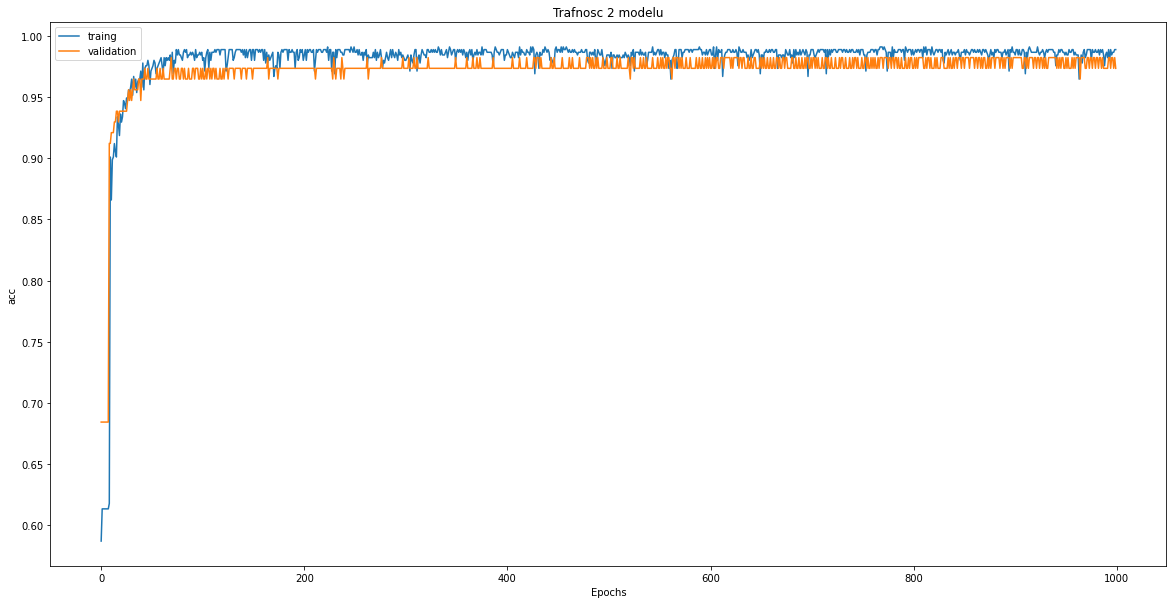

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(resutls2.history["accuracy"])
plt.plot(resutls2.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.title("Trafnosc 2 modelu")
plt.legend(["traing", "validation"])
plt.show()

In [ ]:
resutls2.history["val_accuracy"][-1]

0.9736841917037964

In [ ]:
resutls2.history["accuracy"][-1]

0.9890109896659851

In [ ]:
model3 = tf.keras.Sequential()
model3.add(layers.InputLayer(input_shape=(X_train.shape[1])))
model3.add(
    layers.Dense(
        units = 2,
        activation = "relu",
        use_bias = True)),

model3.add(
    layers.Dense(
        units = 16,
        activation = "relu",
        use_bias = True
    )
      )
model3.add(
    layers.Dense(
        units = 64,
        activation = "relu",
        use_bias = True
    )
      )
model3.add(
    layers.Dense(
        units = 128,
        activation = "relu",
        use_bias = True
    )
      )
model3.add(
    layers.Dense(
        units = 256,
        activation = "relu",
        use_bias = True
    )
      )

model3.add(
    layers.Dense(
        units = 1,
        activation = "sigmoid",
        use_bias = True
    )
      )


In [ ]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 62        
                                                                 
 dense_25 (Dense)            (None, 16)                48        
                                                                 
 dense_26 (Dense)            (None, 64)                1088      
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 42,799
Trainable params: 42,799
Non-trai

In [ ]:
loss3 = losses.BinaryCrossentropy()

In [ ]:
opt3 = optimizers.Adam(
    learning_rate = 0.01,)

In [ ]:
model2.compile(
    optimizer = opt3,
    loss = loss3,
    metrics = ['accuracy']
)

In [ ]:
resutls3 = model2.fit(
    x=X_train,
    y= y_train,
    batch_size = 50,
    epochs = 1000,
    verbose = 0,
    validation_data = (x_val, y_val)
)

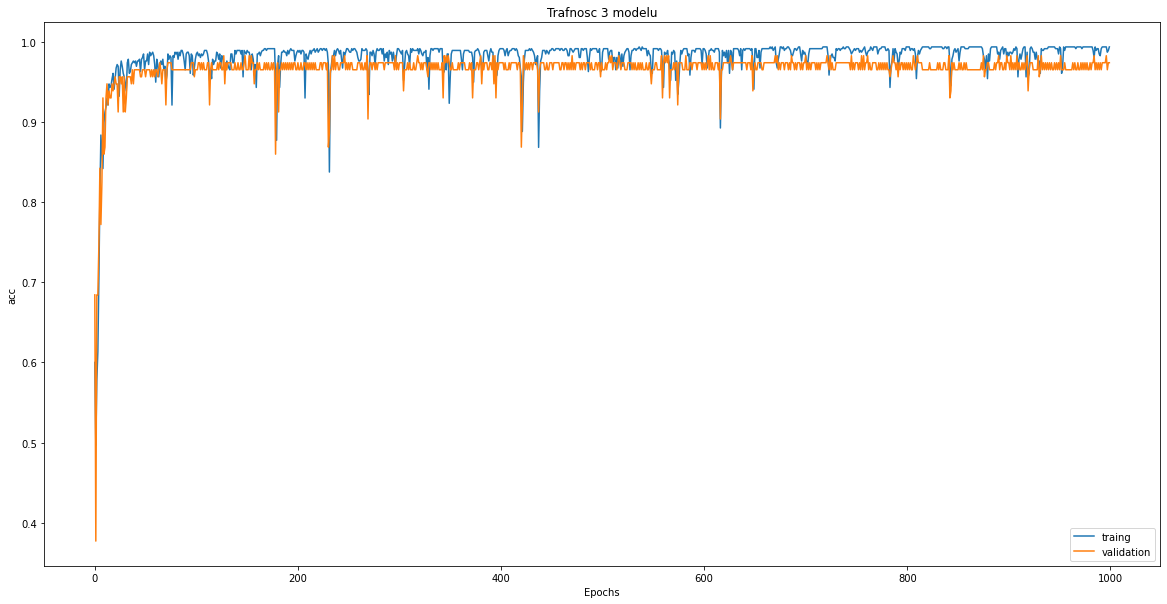

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(resutls3.history["accuracy"])
plt.plot(resutls3.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.title("Trafnosc 3 modelu")
plt.legend(["traing", "validation"])
plt.show()

In [ ]:
resutls3.history["val_accuracy"][-1]

0.9736841917037964

In [ ]:
resutls3.history["accuracy"][-1]

0.9934065937995911